加载数据

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  #StandardScaler模块用于数据标准化

# 加载Fashion-MNIST数据集
fashion_mnist = fetch_openml(name='Fashion-MNIST', version=1)  #fetch_openml函数从Fashion-MNIST数据集中加载数据

# 准备特征和标签
X = fashion_mnist.data  #特征值
y = fashion_mnist.target  #目标值

# 将特征和标签划分为训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #测试数据20%，随机种子42

# 数据标准化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


数据展示

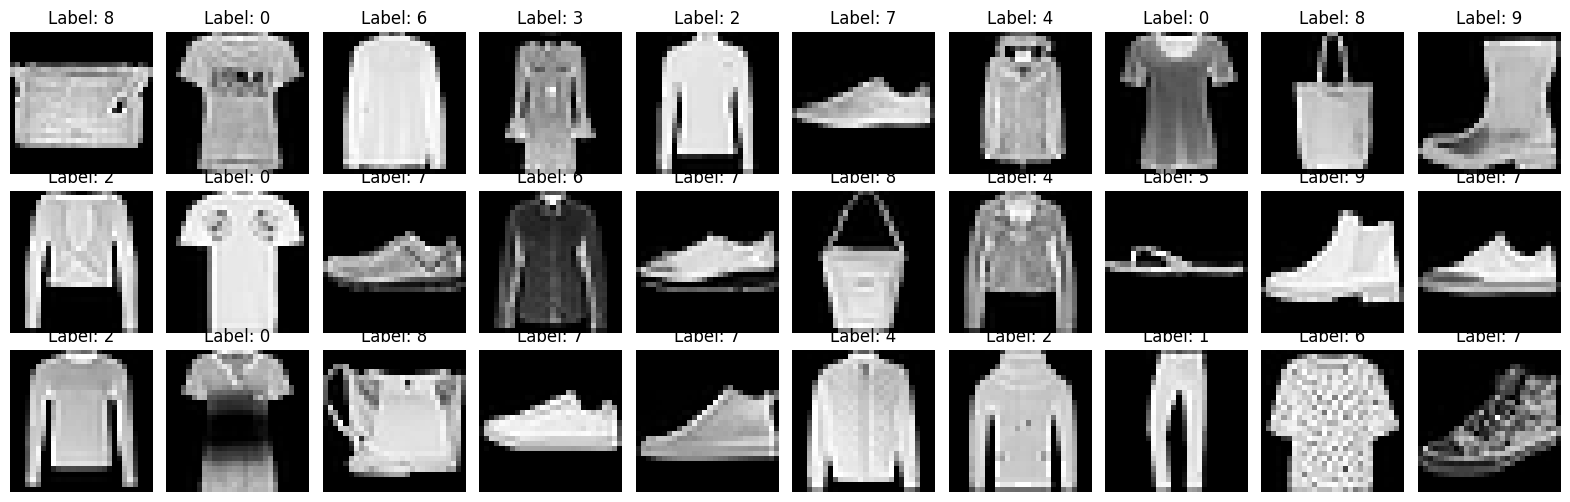

In [ ]:
# 导入所需的库和模块
import numpy as np
import matplotlib.pyplot as plt

# 选择要显示的数据样本数量和索引范围
num_samples = 30  # 要显示的样本数量
start_index = 0  # 数据索引起始位置
end_index = start_index + num_samples  # 数据索引结束位置

# 计算子图的行数和列数
num_rows = int(np.ceil(num_samples / 10))
num_cols = min(num_samples, 10)

# 创建一个图像网格来显示所选数据样本
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows*2))  #subplots函数创建了一个包含num_samples个子图的图像网格

for i, ax in enumerate(axes.flat):
    if (start_index + i) < end_index:
        image = np.array(x_train.iloc[start_index + i]).reshape((28, 28))  #在循环中使用np.reshape函数将特征数据重新调整为28x28的图像格式，以便在图像网格中正确显示
        ax.imshow(image, cmap='gray')  #imshow函数将每个子图设置为对应的图像
        ax.set_title(f"Label: {y_train.iloc[start_index + i]}")  #set_title函数设置每个子图的标题为对应的标签
        ax.axis('off')  #axis('off')函数隐藏坐标轴

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()  #plt.show()函数显示图像网格

KNN

In [ ]:
import time
import numpy as np
from sklearn.neighbors import KNeighborsClassifier  #KNeighborsClassifier模块用于KNN分类器
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 创建和拟合KNN模型
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=5)  #设置n_neighbors参数为5，即K值为5
knn.fit(x_train_scaled, y_train)
print('training took %fs!' % (time.time() - start_time))

# 进行预测并计算性能指标
start_time = time.time()
pred_knn = knn.predict(x_test_scaled)
print('predict took %fs!' % (time.time() - start_time))
report_knn = classification_report(y_test, pred_knn)
confusion_mat_knn = confusion_matrix(y_test, pred_knn)
accuracy_knn = accuracy_score(pred_knn, y_test)

# 打印结果
print(report_knn)
print(confusion_mat_knn)
print('KNN准确率: %0.4lf' % accuracy_knn)

training took 0.315970s!
predict took 48.537325s!
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1394
           1       0.99      0.97      0.98      1402
           2       0.76      0.79      0.77      1407
           3       0.90      0.87      0.89      1449
           4       0.76      0.79      0.77      1357
           5       0.99      0.84      0.91      1449
           6       0.67      0.60      0.63      1407
           7       0.87      0.96      0.91      1359
           8       0.98      0.94      0.96      1342
           9       0.90      0.96      0.93      1434

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000

[[1215    1   23   27    7    0  113    0    7    1]
 [   6 1358    6   22    1    0    8    0    0    1]
 [  29    0 1113   13  142    1  108    1    0    0]
 [  62    5   19 1260   66    0 

朴素贝叶斯

In [ ]:
import time
import numpy as np
from sklearn.naive_bayes import GaussianNB  #GaussianNB模块用于朴素贝叶斯分类器
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 创建和拟合朴素贝叶斯模型
start_time = time.time()
nb = GaussianNB()  #使用高斯朴素贝叶斯模型GaussianNB()
nb.fit(x_train_scaled, y_train)
print('training took %fs!' % (time.time() - start_time))

# 进行预测并计算性能指标
start_time = time.time()
pred_nb = nb.predict(x_test_scaled)
print('predict took %fs!' % (time.time() - start_time))
report_nb = classification_report(y_test, pred_nb)
confusion_mat_nb = confusion_matrix(y_test, pred_nb)
accuracy_nb = accuracy_score(pred_nb, y_test)

# 打印结果
print(report_nb)
print(confusion_mat_nb)
print('朴素贝叶斯准确率: %0.4lf' % accuracy_nb)

training took 0.933243s!
predict took 0.517503s!
              precision    recall  f1-score   support

           0       0.82      0.61      0.70      1394
           1       0.61      0.95      0.74      1402
           2       0.62      0.32      0.42      1407
           3       0.45      0.52      0.49      1449
           4       0.37      0.75      0.50      1357
           5       0.89      0.25      0.39      1449
           6       0.31      0.04      0.08      1407
           7       0.47      0.98      0.64      1359
           8       0.83      0.73      0.78      1342
           9       0.94      0.63      0.75      1434

    accuracy                           0.58     14000
   macro avg       0.63      0.58      0.55     14000
weighted avg       0.63      0.58      0.55     14000

[[ 850   97   34  229  112    0   29    0   43    0]
 [   2 1337   15   37    3    0    6    0    2    0]
 [   6   28  446   84  770    0   40    0   33    0]
 [  10  617    8  759   39    0  

决策树

In [ ]:
import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier  #DecisionTreeClassifier模块用于决策树分类器
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 创建和拟合决策树模型
start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)
print('training took %fs!' % (time.time() - start_time))

# 进行预测并计算性能指标
start_time = time.time()
pred_dt = dt.predict(x_test_scaled)
print('predict took %fs!' % (time.time() - start_time))
report_dt = classification_report(y_test, pred_dt)
confusion_mat_dt = confusion_matrix(y_test, pred_dt)
accuracy_dt = accuracy_score(pred_dt, y_test)

# 打印结果
print(report_dt)
print(confusion_mat_dt)
print('决策树准确率: %0.4lf' % accuracy_dt)

training took 47.474089s!
predict took 0.025409s!
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1394
           1       0.94      0.95      0.95      1402
           2       0.68      0.68      0.68      1407
           3       0.81      0.77      0.79      1449
           4       0.65      0.67      0.66      1357
           5       0.89      0.88      0.89      1449
           6       0.53      0.54      0.53      1407
           7       0.86      0.88      0.87      1359
           8       0.92      0.90      0.91      1342
           9       0.90      0.90      0.90      1434

    accuracy                           0.79     14000
   macro avg       0.79      0.79      0.79     14000
weighted avg       0.79      0.79      0.79     14000

[[1038    8   21   61   23    3  231    0    9    0]
 [  10 1332    2   31   10    0   15    0    2    0]
 [  30    2  960   26  199    1  171    0   13    5]
 [  68   50   31 1112   91    3 

随机森林

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 创建和拟合随机森林模型
start_time = time.time()
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(x_train, y_train)
print('training took %fs!' % (time.time() - start_time))

# 进行预测并计算性能指标
start_time = time.time()
pred_rf = rf.predict(x_test)
print('predict took %fs!' % (time.time() - start_time))
report_rf = classification_report(y_test, pred_rf)
confusion_mat_rf = confusion_matrix(y_test, pred_rf)
accuracy_rf = accuracy_score(pred_rf, y_test)

# 打印结果
print(report_rf)
print(confusion_mat_rf)
print('随机森林准确率: %0.4lf' % accuracy_rf)

training took 77.639878s!
predict took 0.577737s!
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1394
           1       0.99      0.97      0.98      1402
           2       0.80      0.82      0.81      1407
           3       0.89      0.92      0.90      1449
           4       0.78      0.85      0.81      1357
           5       0.97      0.96      0.97      1449
           6       0.74      0.60      0.66      1407
           7       0.93      0.95      0.94      1359
           8       0.96      0.98      0.97      1342
           9       0.96      0.95      0.96      1434

    accuracy                           0.89     14000
   macro avg       0.88      0.89      0.88     14000
weighted avg       0.88      0.89      0.88     14000

[[1204    0   18   46    6    0  110    0   10    0]
 [   3 1357    7   28    0    1    4    0    2    0]
 [   6    1 1155   15  144    0   77    0    9    0]
 [  22    5   13 1329   44    0 

逻辑回归

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 创建和拟合逻辑回归模型
start_time = time.time()
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)
print('training took %fs!' % (time.time() - start_time))

# 进行预测并计算性能指标
start_time = time.time()
pred_lr = lr.predict(x_test_scaled)
print('predict took %fs!' % (time.time() - start_time))
report_lr = classification_report(y_test, pred_lr)
confusion_mat_lr = confusion_matrix(y_test, pred_lr)
accuracy_lr = accuracy_score(pred_lr, y_test)

# 打印结果
print(report_lr)
print(confusion_mat_lr)
print('LR准确率: %0.4lf' % accuracy_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training took 45.831819s!
predict took 0.067209s!
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1394
           1       0.97      0.97      0.97      1402
           2       0.76      0.75      0.75      1407
           3       0.86      0.87      0.87      1449
           4       0.74      0.79      0.77      1357
           5       0.93      0.94      0.93      1449
           6       0.65      0.59      0.62      1407
           7       0.91      0.93      0.92      1359
           8       0.94      0.94      0.94      1342
           9       0.96      0.94      0.95      1434

    accuracy                           0.85     14000
   macro avg       0.85      0.85      0.85     14000
weighted avg       0.85      0.85      0.85     14000

[[1122    2   31   71    7    3  137    1   20    0]
 [   5 1356    5   23    4    1    4    2    2    0]
 [  31    8 1050   17  172    4  114    1   10    0]
 [  39   25   13 1265   41    1 

支持向量机

In [ ]:
import time
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 创建和拟合支持向量机模型
start_time = time.time()
svm = SVC()
svm.fit(x_train_scaled, y_train)
print('training took %fs!' % (time.time() - start_time))

# 进行预测并计算性能指标
start_time = time.time()
pred_svm = svm.predict(x_test_scaled)
print('predict took %fs!' % (time.time() - start_time))
report_svm = classification_report(y_test, pred_svm)
confusion_mat_svm = confusion_matrix(y_test, pred_svm)
accuracy_svm = accuracy_score(pred_svm, y_test)

# 打印结果
print(report_svm)
print(confusion_mat_svm)
print('SVC准确率: %0.4lf' % accuracy_svm)

training took 419.145885s!
predict took 279.511573s!
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1394
           1       1.00      0.97      0.98      1402
           2       0.83      0.82      0.83      1407
           3       0.88      0.91      0.89      1449
           4       0.81      0.84      0.82      1357
           5       0.97      0.96      0.96      1449
           6       0.74      0.66      0.70      1407
           7       0.93      0.96      0.95      1359
           8       0.94      0.98      0.96      1342
           9       0.97      0.95      0.96      1434

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000

[[1194    0   14   51    6    1  111    0   17    0]
 [   2 1360    3   29    1    0    4    0    2    1]
 [  18    0 1158   17  118    1   90    0    5    0]
 [  27    2    8 1319   49   